In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
r = {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"}

da["DMDMARTLx"] = da["DMDMARTL"].replace(r)

print("All subjects:")
x = da["DMDMARTLx"].value_counts()
print(x / x.sum())

for ky,db in da.groupby("RIAGENDR"):
    print("\nRIAGENDR=", ky)
    x = db["DMDMARTLx"].value_counts()
    print(x / x.sum())
    
da3040 = da.query('RIDAGEYR >= 30 & RIDAGEYR <= 40')

for ky,db in da3040.groupby("RIAGENDR"):
    print("\nRIAGENDR=", ky, " 30 <= RIDAGEYR <= 40")
    x = db["DMDMARTLx"].value_counts()
    print(x / x.sum())

All subjects:
DMDMARTLx
Married         0.507855
NeverMarried    0.183412
Divorced        0.105773
Cohabitating    0.096273
Widowed         0.072342
Separated       0.033979
Refused         0.000365
Name: count, dtype: float64

RIAGENDR= 1
DMDMARTLx
Married         0.562881
NeverMarried    0.184451
Cohabitating    0.100991
Divorced        0.087271
Widowed         0.038110
Separated       0.025915
Refused         0.000381
Name: count, dtype: float64

RIAGENDR= 2
DMDMARTLx
Married         0.457193
NeverMarried    0.182456
Divorced        0.122807
Widowed         0.103860
Cohabitating    0.091930
Separated       0.041404
Refused         0.000351
Name: count, dtype: float64

RIAGENDR= 1  30 <= RIDAGEYR <= 40
DMDMARTLx
Married         0.556680
NeverMarried    0.204453
Cohabitating    0.157895
Divorced        0.048583
Separated       0.024291
Widowed         0.006073
Refused         0.002024
Name: count, dtype: float64

RIAGENDR= 2  30 <= RIDAGEYR <= 40
DMDMARTLx
Married         0.535714
Nev

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1.

In [8]:
# insert your code here
db_female = da.groupby("RIAGENDR", observed=True).get_group(2)
db_female["agegrp"] = pd.cut(db_female["RIDAGEYR"], [18, 28, 38, 48, 58, 68, 78, 80])
dx = db_female.groupby("agegrp", observed=True)['DMDMARTLx'].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx.to_string(float_format="%.3f"))

DMDMARTLx  Cohabitating  Divorced  Married  NeverMarried  Refused  Separated  Widowed
agegrp                                                                               
(18, 28]          0.210     0.016    0.242         0.509      NaN      0.023      NaN
(28, 38]          0.150     0.069    0.516         0.233      NaN      0.030    0.002
(38, 48]          0.074     0.138    0.572         0.142      NaN      0.058    0.016
(48, 58]          0.068     0.185    0.546         0.084      NaN      0.062    0.055
(58, 68]          0.045     0.180    0.504         0.090    0.002      0.049    0.129
(68, 78]          0.011     0.179    0.380         0.057      NaN      0.036    0.337
(78, 80]          0.010     0.100    0.289         0.055      NaN      0.010    0.537


/var/folders/y6/3wv99k9n6cb7qr5yx02vyqnm0000gn/T/ipykernel_65502/2273018772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_female["agegrp"] = pd.cut(db_female["RIDAGEYR"], [18, 28, 38, 48, 58, 68, 78, 80])


**Q2a.** Comment on the trends that you see in this series of marginal distributions.

Women between the ages of 18 and 28 declared that will never married.

**Q2b.** Repeat the analysis for males.

In [9]:
# insert your code here
db_male = da.groupby("RIAGENDR").get_group(1)
db_male["agegrp"] = pd.cut(db_male.RIDAGEYR, [18, 28, 38, 48, 58, 68, 78, 80])
dx = db_male.groupby("agegrp")['DMDMARTLx'].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx.to_string(float_format="%.3f"))

DMDMARTLx  Cohabitating  Divorced  Married  NeverMarried  Refused  Separated  Widowed
agegrp                                                                               
(18, 28]          0.207     0.005    0.171         0.606    0.000      0.010    0.000
(28, 38]          0.165     0.036    0.531         0.233    0.000      0.028    0.006
(38, 48]          0.101     0.075    0.693         0.103    0.003      0.020    0.005
(48, 58]          0.067     0.129    0.663         0.098    0.000      0.026    0.017
(58, 68]          0.057     0.130    0.647         0.096    0.000      0.036    0.034
(68, 78]          0.036     0.143    0.645         0.036    0.000      0.039    0.101
(78, 80]          0.011     0.119    0.605         0.017    0.000      0.017    0.232


/var/folders/y6/3wv99k9n6cb7qr5yx02vyqnm0000gn/T/ipykernel_65502/3392661472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_male["agegrp"] = pd.cut(db_male.RIDAGEYR, [18, 28, 38, 48, 58, 68, 78, 80])
/var/folders/y6/3wv99k9n6cb7qr5yx02vyqnm0000gn/T/ipykernel_65502/3392661472.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx = db_male.groupby("agegrp")['DMDMARTLx'].value_counts()


**Q2c.** Comment on any notable differences that you see when comparing these results between females and for males.

Men are 38 in advanced are still married in gross numbers.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

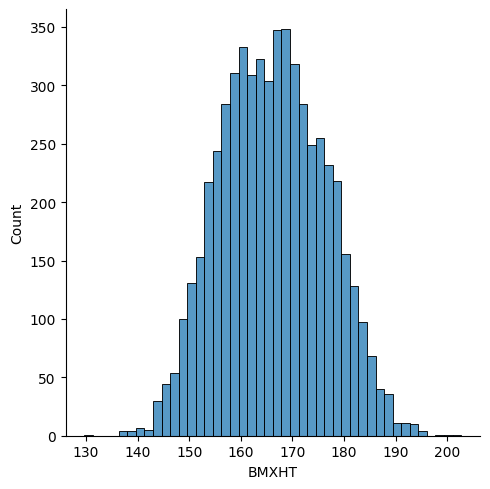

In [10]:
# insert your code here
sns.displot(da.BMXHT.dropna())

**Q3a.** Use the `bins` argument to [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) to produce histograms with different numbers of bins. Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small.

<Axes: xlabel='BMXHT', ylabel='Count'>

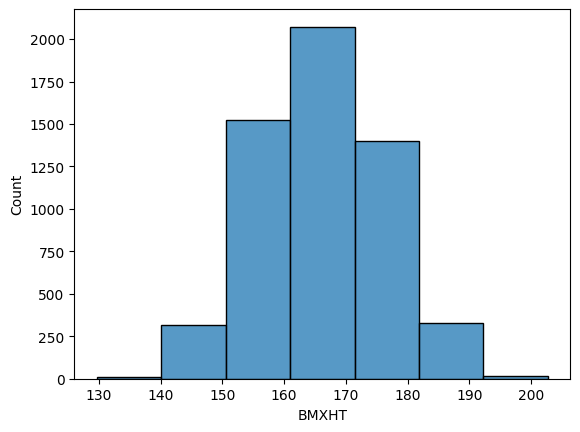

In [16]:
sns.histplot(data=da, x="BMXHT", binwidth=10)

**Q3b.** Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

Text(0.5, 1.0, 'Female Heights Boxplot')

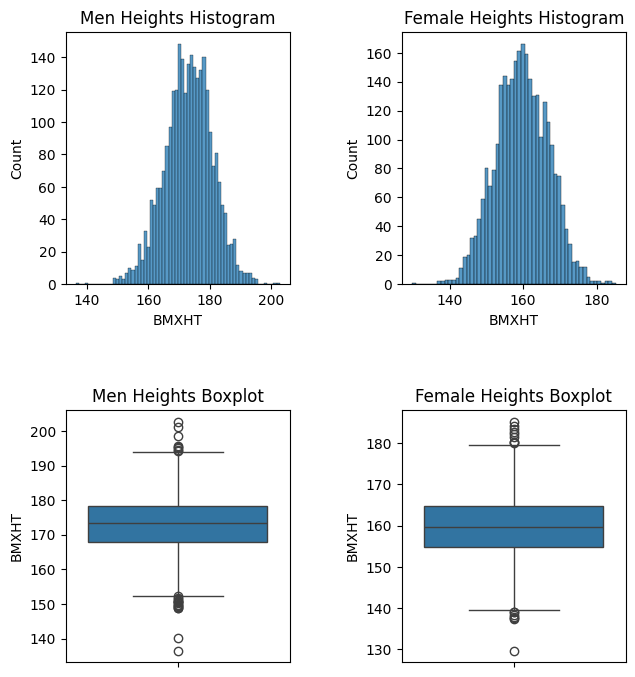

In [29]:
# insert your code here
maleHeight = da.groupby("RIAGENDR").get_group(1).BMXHT
femaleHeight = da.groupby("RIAGENDR").get_group(2).BMXHT

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(7, 7))
plt.subplots_adjust(left=0.2, bottom=0.1, right=1, top=1, wspace=0.5, hspace=0.5)

sns.histplot(ax=ax1, data=maleHeight, binwidth=1)
ax1.set_title("Men Heights Histogram")

sns.histplot(ax=ax2, data=femaleHeight, binwidth=1)
ax2.set_title("Female Heights Histogram")

sns.boxplot(ax=ax3, y=maleHeight)
ax3.set_title("Men Heights Boxplot")

sns.boxplot(ax=ax4, y=femaleHeight)
ax4.set_title("Female Heights Boxplot")

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

/var/folders/y6/3wv99k9n6cb7qr5yx02vyqnm0000gn/T/ipykernel_65502/2368818473.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  da.BPX_diff = da.BPXSY1 - da.BPXSY2


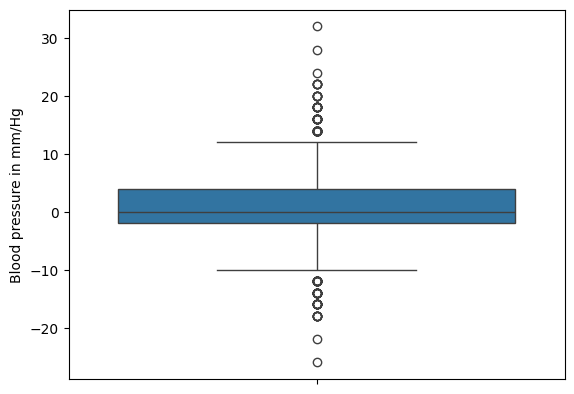

In [30]:
# insert your code here
da.BPX_diff = da.BPXSY1 - da.BPXSY2
bp = sns.boxplot(y=da.BPX_diff)
_ = bp.set_ylabel("Blood pressure in mm/Hg")

**Q4a.** What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [31]:
# insert your code here
subjects = da.query("BPXSY2 < BPXSY1")
"{:.3%}".format(subjects.SEQN.count() / da.SEQN.count())

'42.947%'

**Q4b.** Make side-by-side boxplots of the two systolic blood pressure variables.

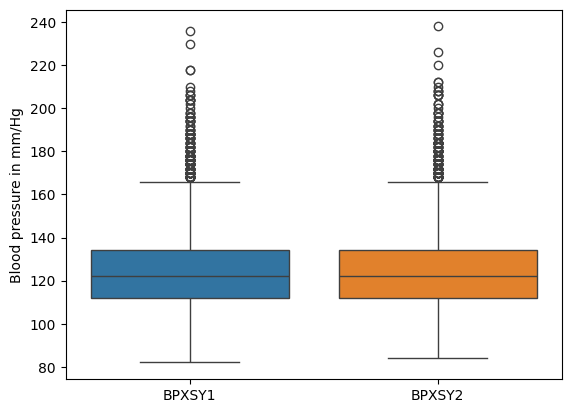

In [32]:
# insert your code here
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)). Convert the frequencies to proportions.

In [34]:
# frequency (counts) table
pd.crosstab(da.DMDEDUC2,da.DMDHHSIZ)

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,72,147,96,87,97,71,85
2.0,75,143,105,98,94,73,55
3.0,181,321,203,192,130,78,81
4.0,245,436,313,274,198,82,73
5.0,195,475,265,226,130,40,35
9.0,0,2,0,0,1,0,0


In [35]:
# insert your code here
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["DMDEDUC2x"])["DMDHHSIZ"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDHHSIZ            1     2     3     4     5     6     7
DMDEDUC2x                                                
9-11            0.117 0.222 0.163 0.152 0.146 0.114 0.086
<9              0.110 0.224 0.147 0.133 0.148 0.108 0.130
College         0.143 0.348 0.194 0.165 0.095 0.029 0.026
HS/GED          0.153 0.271 0.171 0.162 0.110 0.066 0.068
Some college/AA 0.151 0.269 0.193 0.169 0.122 0.051 0.045


**Q5b.** Restrict the sample to people between 30 and 40 years of age. Then calculate the median household size for women and men within each level of educational attainment.

In [37]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# relabel RIAGENDR
rgen = {1: "Male", 2: "Female"}
da_mod["RIAGENDRx"] = da_mod["RIAGENDR"].replace(rgen)

# relabel DMDEDUC2
redu = {1: "1) LT 9", 2: "2) 9 to 11", 3: "3) HS or GED", 4: "4) Some college or AA", 5: "5) College", 7: "7) Refused", 9: "9) Don't know"}
da_mod["DMDEDUC2x"] = da_mod.DMDEDUC2.replace(redu)

# drop the variables that we don't need
da_mod = da_mod[["RIAGENDRx", "RIDAGEYR", "DMDEDUC2x", "DMDHHSIZ"]]

In [40]:
# create a closed interval range from 30 to 40
binrange = pd.interval_range(start=30, end=40, periods=1, closed='both')

# create the 30-40 'bin' variable
da_mod["agegrp"] = pd.cut(da_mod.RIDAGEYR, binrange)

# what does DMDEDUC2x look like?
#print(da_mod.DMDEDUC2x.value_counts())

# drop rare or missing values
da_mod = da_mod.loc[~da_mod.DMDEDUC2x.isin(["7) Refused", "9) Don't know"]), :]

# median by RIAGENDRx and DMDEDUC2x
dx = da_mod.groupby(["agegrp", "RIAGENDRx", "DMDEDUC2x"], observed=True)["DMDHHSIZ"].median()
print(dx)

# another way to isolate subjects between 30 and 40 years old
#da3040 = da_mod.query('RIDAGEYR >= 30 & RIDAGEYR <= 40').copy()

# median by RIAGENDRx and DMDEDUC2x
#print(da3040.groupby(["RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].median())

agegrp    RIAGENDRx  DMDEDUC2x            
[30, 40]  Female     1) LT 9                  5.0
                     2) 9 to 11               5.0
                     3) HS or GED             5.0
                     4) Some college or AA    4.0
                     5) College               3.0
          Male       1) LT 9                  5.0
                     2) 9 to 11               4.5
                     3) HS or GED             4.0
                     4) Some college or AA    4.0
                     5) College               3.0
Name: DMDHHSIZ, dtype: float64


In [41]:
# insert your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
dx = da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR < 40)]
print("Median household size for Males: ", dx.query('RIAGENDR == 1')["DMDHHSIZ"].mean())
print("Median household size for Females: ", dx.query('RIAGENDR == 2')["DMDHHSIZ"].mean())

Median household size for Males:  3.9513274336283186
Median household size for Females:  4.124740124740125


## Question 6

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU). Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [42]:
# insert your code here
dMVU = da.groupby(["SDMVSTRA", "SDMVPSU"])
for key, data in dMVU:
    print(key, ": ")
    print ("-----------------------------")
    print("Data for Males: ")
    print("\t Mean Age: ", data.query('RIAGENDR == 1').RIDAGEYR.mean())
    print("\t Mean Height: ", data.query('RIAGENDR == 1').BMXHT.mean())
    print("\t Mean BMI: ", data.query('RIAGENDR == 1').BMXBMI.mean())
    print ("-----------------------------")
    print("Data for Females: ")
    print("\t Mean Age: ", data.query('RIAGENDR == 2').RIDAGEYR.mean())
    print("\t Mean Height: ", data.query('RIAGENDR == 2').BMXHT.mean())
    print("\t Mean BMI: ", data.query('RIAGENDR == 2').BMXBMI.mean())
    print("\n")

(np.int64(119), np.int64(1)) : 
-----------------------------
Data for Males: 
	 Mean Age:  47.861111111111114
	 Mean Height:  172.74166666666667
	 Mean BMI:  26.958333333333332
-----------------------------
Data for Females: 
	 Mean Age:  47.66326530612245
	 Mean Height:  159.5704081632653
	 Mean BMI:  30.052040816326535


(np.int64(119), np.int64(2)) : 
-----------------------------
Data for Males: 
	 Mean Age:  54.36363636363637
	 Mean Height:  172.9068181818182
	 Mean BMI:  27.160465116279077
-----------------------------
Data for Females: 
	 Mean Age:  52.98795180722892
	 Mean Height:  159.24457831325302
	 Mean BMI:  27.849397590361445


(np.int64(120), np.int64(1)) : 
-----------------------------
Data for Males: 
	 Mean Age:  43.13
	 Mean Height:  169.53775510204082
	 Mean BMI:  30.939175257731957
-----------------------------
Data for Females: 
	 Mean Age:  43.63636363636363
	 Mean Height:  155.40204081632652
	 Mean BMI:  32.419387755102036


(np.int64(120), np.int64(2)) : 
---

**Q6a.** Comment on the extent to which mean age, height, and BMI vary among the MVUs.

**Q6b.** Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU. Report the ratio between the largest and smalles IQR across the MVUs.

In [43]:
# insert your code here
dGENMVU = da.groupby(["SDMVSTRA", "SDMVPSU"])
for key, data in dMVU:
    print(key, ", IQR for Age: ", data.RIDAGEYR.describe().loc["75%"] - data.RIDAGEYR.describe().loc["25%"])
    print(key, ", IQR for Height: ", data.BMXHT.describe().loc["75%"] - data.BMXHT.describe().loc["25%"])
    print(key, ", IQR for BMI: ", data.BMXBMI.describe().loc["75%"] - data.BMXBMI.describe().loc["25%"])
    print ("------------------------------------------------------------")

(np.int64(119), np.int64(1)) , IQR for Age:  31.25
(np.int64(119), np.int64(1)) , IQR for Height:  12.375
(np.int64(119), np.int64(1)) , IQR for BMI:  8.899999999999999
------------------------------------------------------------
(np.int64(119), np.int64(2)) , IQR for Age:  33.0
(np.int64(119), np.int64(2)) , IQR for Height:  13.849999999999994
(np.int64(119), np.int64(2)) , IQR for BMI:  7.875
------------------------------------------------------------
(np.int64(120), np.int64(1)) , IQR for Age:  26.0
(np.int64(120), np.int64(1)) , IQR for Height:  15.25
(np.int64(120), np.int64(1)) , IQR for BMI:  9.299999999999997
------------------------------------------------------------
(np.int64(120), np.int64(2)) , IQR for Age:  27.0
(np.int64(120), np.int64(2)) , IQR for Height:  14.0
(np.int64(120), np.int64(2)) , IQR for BMI:  7.600000000000001
------------------------------------------------------------
(np.int64(121), np.int64(1)) , IQR for Age:  31.5
(np.int64(121), np.int64(1)) , IQR f